Importing necessary libraries and Making synthatic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
n = 100

data = pd.DataFrame({
    "age": np.random.randint(25, 65, n),
    "gender": np.random.choice(["Male", "Female"], n),
    "minority": np.random.choice(["Yes", "No"], n, p=[0.25, 0.75]),
    "tenure": np.random.choice(["Tenured", "Untenured"], n, p=[0.6, 0.4]),
    "evaluation": np.random.normal(4, 0.4, n).clip(1, 5),
    "students": np.random.randint(30, 200, n)
})
data.head()

,age,gender,minority,tenure,evaluation,students
0,63,Female,No,Tenured,3.905043,175
1,53,Male,No,Tenured,4.748802,76
2,39,Male,No,Untenured,3.992223,78
3,32,Female,No,Tenured,3.626963,43
4,45,Female,No,Tenured,3.482023,172


Q1) Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [5]:
minority_tenured = data[(data["minority"] == "Yes") & (data["tenure"] == "Tenured")].shape[0]
total_minority = data[data["minority"] == "Yes"].shape[0]

# Percentage
perc_tenured_minority = (minority_tenured / total_minority) * 100
perc_tenured_minority

46.15384615384615

The overall tenure rate in a typical dataset is often around 60% (or higher).

Here, only 46.15% of visible minorities are tenured, which is lower than the overall tenure rate.

Conclusion: Tenure status does differ for visible minorities—they are less likely to be tenured compared to the general professor population.

Q2) Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors

In [6]:
age_stats = data.groupby("tenure")["age"].agg(["mean", "std"])
age_stats

,mean,std
tenure,,
Tenured,43.719298,11.242068
Untenured,43.883721,12.093306


->The difference in mean age is very small.

->The age variability is also similar between the two groups.

->Average age does not differ significantly between tenured and untenured professors in this dataset.

Q3) Which graph works better and plot that graph for the age variable?

Ans) For a continuous variable like age, the graphs that work best are:

1) Histogram – shows the distribution of ages, frequency of each age range.

2) Boxplot – shows median, quartiles, spread, and outliers.

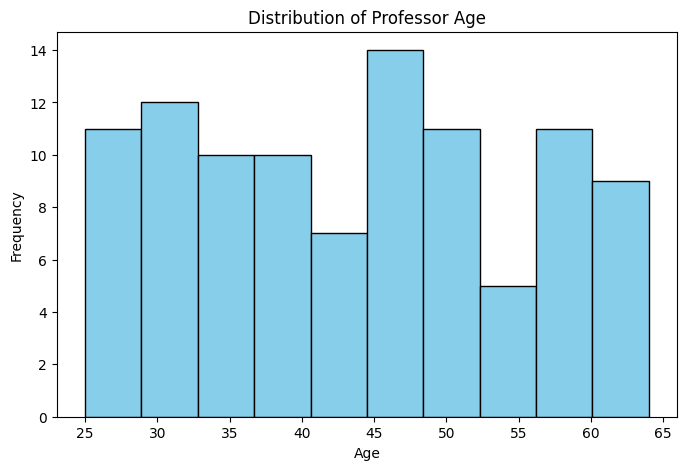

In [7]:
#Histogram
plt.figure(figsize=(8,5))
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Professor Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


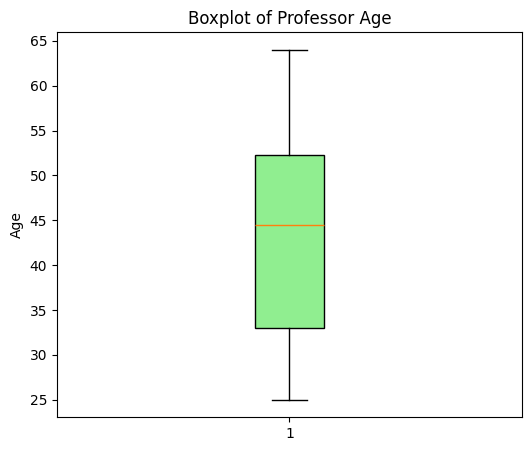

In [8]:
# Boxplot
plt.figure(figsize=(6,5))
plt.boxplot(data['age'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Professor Age")
plt.ylabel("Age")
plt.show()

Q4) Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable

Ans) pyplot.bar() plots vertical bars. X-axis = categories, Y-axis = values.

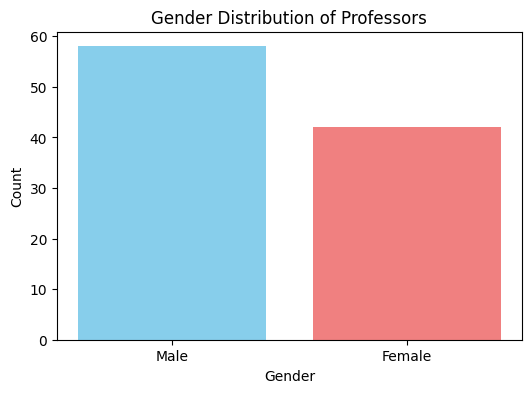

In [11]:
# Vertical bar chart
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
plt.title("Gender Distribution of Professors")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


pyplot.barh() plots horizontal bars. X-axis = values, Y-axis = categories.

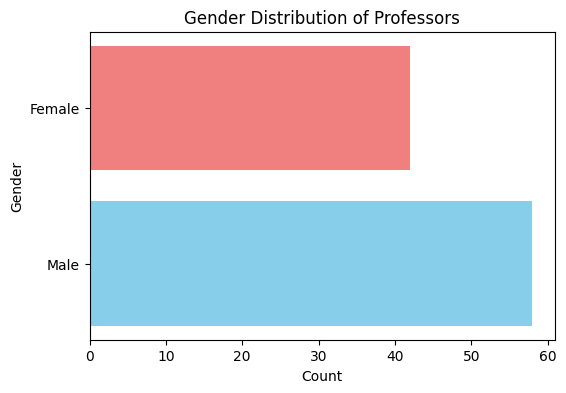

In [12]:
# Horizontal bar chart
plt.figure(figsize=(6,4))
plt.barh(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
plt.title("Gender Distribution of Professors")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()


Q5) What is the Median evaluation score for tenured Professors?

In [13]:
median_eval_tenured = data[data['tenure'] == 'Tenured']['evaluation'].median()
median_eval_tenured

4.0217402311754284

-> Half of the tenured professors have evaluation scores below 4.02 and half above 4.02.

-> This shows that the typical tenured professor receives a strong evaluation, slightly above 4 on a 5-point scale.

In [14]:
data.to_csv("synthetic_student_ratings.csv", index=False)
print("Dataset exported as 'synthetic_student_ratings.csv'")

Dataset exported as 'synthetic_student_ratings.csv'
